In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 50
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [3]:
df = pd.DataFrame()
df["reviews"] = reviews

In [4]:
df.head()

,reviews
0,✅ Trip Verified | We are extremely grateful ...
1,✅ Trip Verified | I had an appalling experie...
2,"Not Verified | Good points, the cabin crew, t..."
3,"Not Verified | It was a decent flight, reason..."
4,✅ Trip Verified | I really like flying Briti...


In [5]:
df

,reviews
0,✅ Trip Verified | We are extremely grateful ...
1,✅ Trip Verified | I had an appalling experie...
2,"Not Verified | Good points, the cabin crew, t..."
3,"Not Verified | It was a decent flight, reason..."
4,✅ Trip Verified | I really like flying Briti...
...,...
3933,YYZ to LHR - July 2012 - I flew overnight in p...
3934,LHR to HAM. Purser addresses all club passenge...
3935,My son who had worked for British Airways urge...
3936,London City-New York JFK via Shannon on A318 b...


# Data Cleaning

In [7]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [8]:
df

,reviews
0,We are extremely grateful to the crew of fl...
1,I had an appalling experience with British ...
2,"Good points, the cabin crew, they were helpf..."
3,"It was a decent flight, reasonable comfortab..."
4,I really like flying British Airways partic...
...,...
3933,None
3934,None
3935,None
3936,None


In [9]:
df.to_csv("British_Airways_Reviews.csv")

In [10]:
print(df["reviews"].isnull().sum()) 

1523


In [11]:
df = df.dropna(subset=["reviews"])

In [12]:
print(df["reviews"].isnull().sum()) 

0


In [13]:
import string

def case_and_punctuation_handling(text):
    lower_case_text = text.lower()
    cleaned_text = lower_case_text.translate(str.maketrans("", "", string.punctuation))
    return cleaned_text

df["cleaned_reviews"] = df["reviews"].apply(case_and_punctuation_handling)
df.head()

,reviews,cleaned_reviews
0,We are extremely grateful to the crew of fl...,we are extremely grateful to the crew of fl...
1,I had an appalling experience with British ...,i had an appalling experience with british ...
2,"Good points, the cabin crew, they were helpf...",good points the cabin crew they were helpful...
3,"It was a decent flight, reasonable comfortab...",it was a decent flight reasonable comfortabl...
4,I really like flying British Airways partic...,i really like flying british airways partic...


# Tokenization, Stopwords removal, and POS-tagging

In [15]:
import nltk

# Downloading all nltk packages to avoid compatibility issues.
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [16]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet

In [17]:
# POS tagging dictionary.
pos_dict = {"J":wordnet.ADJ, "V":wordnet.VERB, "N":wordnet.NOUN, "R":wordnet.ADV}

def handle_tokenization_stopwords_postags(text):
    # Tokenization.
    tokenized_text = word_tokenize(text)
    # POS-tagging.
    tags = pos_tag(tokenized_text)
    new_text_list = []
    for word, tag in tags:
        # Stopword removal.
        if word not in stopwords.words("english"):
          new_text_list.append(tuple([word, pos_dict.get(tag[0])]))
    return new_text_list 

df["POS_tagged_reviews"] = df["cleaned_reviews"].apply(handle_tokenization_stopwords_postags)
df.head()

,reviews,cleaned_reviews,POS_tagged_reviews
0,We are extremely grateful to the crew of fl...,we are extremely grateful to the crew of fl...,"[(extremely, r), (grateful, a), (crew, n), (fl..."
1,I had an appalling experience with British ...,i had an appalling experience with british ...,"[(appalling, a), (experience, n), (british, a)..."
2,"Good points, the cabin crew, they were helpf...",good points the cabin crew they were helpful...,"[(good, a), (points, n), (cabin, n), (crew, n)..."
3,"It was a decent flight, reasonable comfortab...",it was a decent flight reasonable comfortabl...,"[(decent, a), (flight, n), (reasonable, a), (c..."
4,I really like flying British Airways partic...,i really like flying british airways partic...,"[(really, r), (like, None), (flying, v), (brit..."


# Lemmatization

In [19]:
# Obtaining stem-words with Lemmatization.
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def text_lemmatization(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df["lemmatized_reviews"] = df["POS_tagged_reviews"].apply(text_lemmatization)
df.head()

,reviews,cleaned_reviews,POS_tagged_reviews,lemmatized_reviews
0,We are extremely grateful to the crew of fl...,we are extremely grateful to the crew of fl...,"[(extremely, r), (grateful, a), (crew, n), (fl...",extremely grateful crew flight ba0058 cape t...
1,I had an appalling experience with British ...,i had an appalling experience with british ...,"[(appalling, a), (experience, n), (british, a)...",appalling experience british airway start tr...
2,"Good points, the cabin crew, they were helpf...",good points the cabin crew they were helpful...,"[(good, a), (points, n), (cabin, n), (crew, n)...",good point cabin crew helpful professional m...
3,"It was a decent flight, reasonable comfortab...",it was a decent flight reasonable comfortabl...,"[(decent, a), (flight, n), (reasonable, a), (c...",decent flight reasonable comfortable seat pi...
4,I really like flying British Airways partic...,i really like flying british airways partic...,"[(really, r), (like, None), (flying, v), (brit...",really like fly british airway particularly ...


# Sentiment Analysis

In [21]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def vader_analysis(sentiment_text):
    score = analyzer.polarity_scores(sentiment_text)
    return score["compound"]

df["VADER_compound_score"] = df["lemmatized_reviews"].apply(vader_analysis)

# function to analyse
def sentiment_classifier(compound_score):
    if compound_score >= 0.5:
        return "Positive"
    elif compound_score < 0 :
        return "Negative"
    else:
        return "Neutral"

df["Sentiment"] = df["VADER_compound_score"].apply(sentiment_classifier)
df.head()

,reviews,cleaned_reviews,POS_tagged_reviews,lemmatized_reviews,VADER_compound_score,Sentiment
0,We are extremely grateful to the crew of fl...,we are extremely grateful to the crew of fl...,"[(extremely, r), (grateful, a), (crew, n), (fl...",extremely grateful crew flight ba0058 cape t...,0.8016,Positive
1,I had an appalling experience with British ...,i had an appalling experience with british ...,"[(appalling, a), (experience, n), (british, a)...",appalling experience british airway start tr...,-0.9748,Negative
2,"Good points, the cabin crew, they were helpf...",good points the cabin crew they were helpful...,"[(good, a), (points, n), (cabin, n), (crew, n)...",good point cabin crew helpful professional m...,0.9136,Positive
3,"It was a decent flight, reasonable comfortab...",it was a decent flight reasonable comfortabl...,"[(decent, a), (flight, n), (reasonable, a), (c...",decent flight reasonable comfortable seat pi...,0.9231,Positive
4,I really like flying British Airways partic...,i really like flying british airways partic...,"[(really, r), (like, None), (flying, v), (brit...",really like fly british airway particularly ...,0.9636,Positive


In [22]:
sentiment_counts = df["Sentiment"].value_counts()
sentiment_counts

Sentiment
Positive    1205
Negative     939
Neutral      271
Name: count, dtype: int64

In [23]:
df.to_csv("analysed_reviews.csv")

# Data Vizualization: Pie-Chart

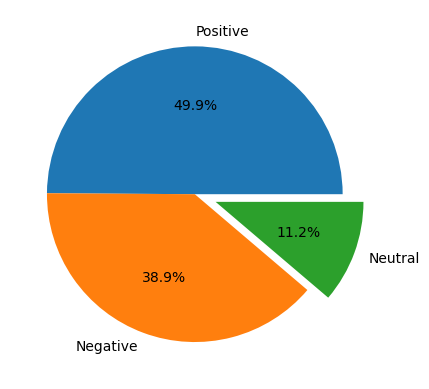

In [25]:
import matplotlib.pyplot as plt 
import seaborn as sns
  
# Declaring data. 
data = sentiment_counts.values
  
# Define Seaborn color palette to use. 
palette_color = sns.color_palette() 
  
# Plotting data on chart. 
plt.pie(data, labels=sentiment_counts.index, colors=palette_color, explode = (0, 0, 0.15), autopct="%.1f%%") 
  
# Displaying chart. 
plt.show() 

# wordcloud

In [31]:
!pip install wordcloud


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
import sys
print(sys.executable)

C:\Users\GS\anaconda3\python.exe


In [39]:
!C:\Users\GS\anaconda3\python.exe -m pip install wordcloud

  Using cached wordcloud-1.9.4-cp312-cp312-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.4-cp312-cp312-win_amd64.whl (301 kB)


In [41]:
from wordcloud import WordCloud

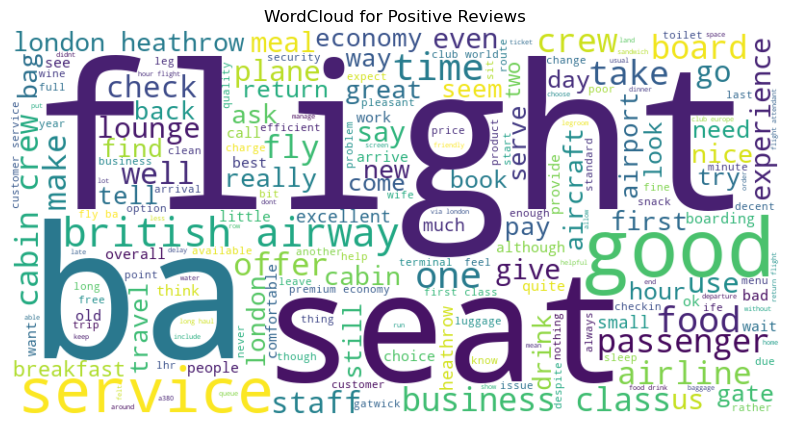

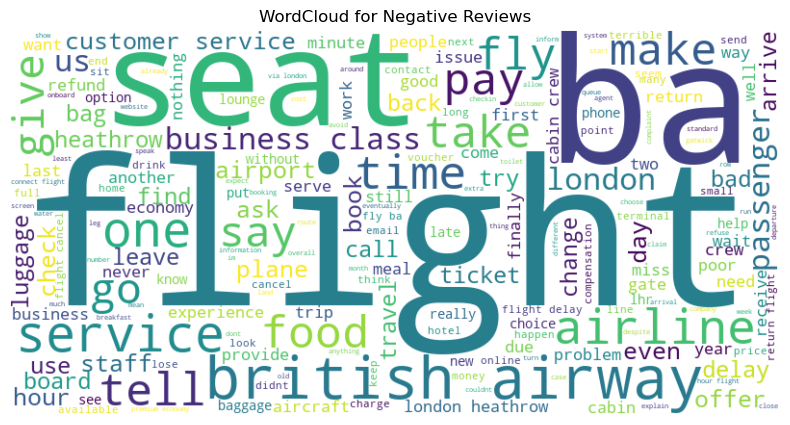

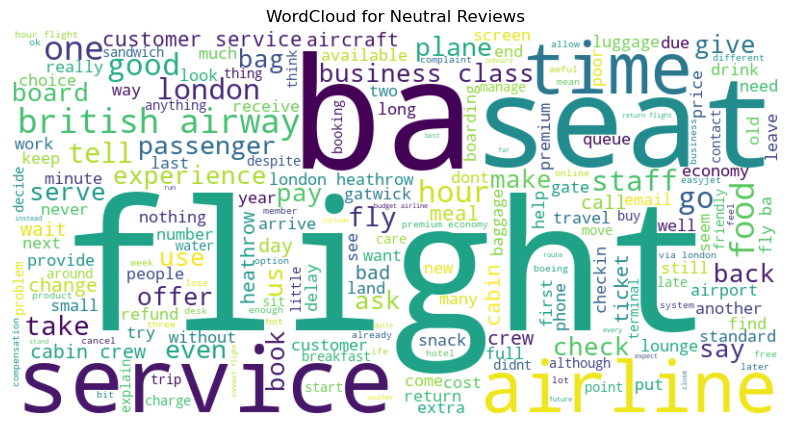

In [43]:
# Function to generate wordcloud for a given sentiment
def generate_wordcloud(sentiment_label):
    text = " ".join(df[df["Sentiment"] == sentiment_label]["lemmatized_reviews"])
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"WordCloud for {sentiment_label} Reviews")
    plt.show()

# Generate wordclouds
generate_wordcloud("Positive")
generate_wordcloud("Negative")
generate_wordcloud("Neutral")

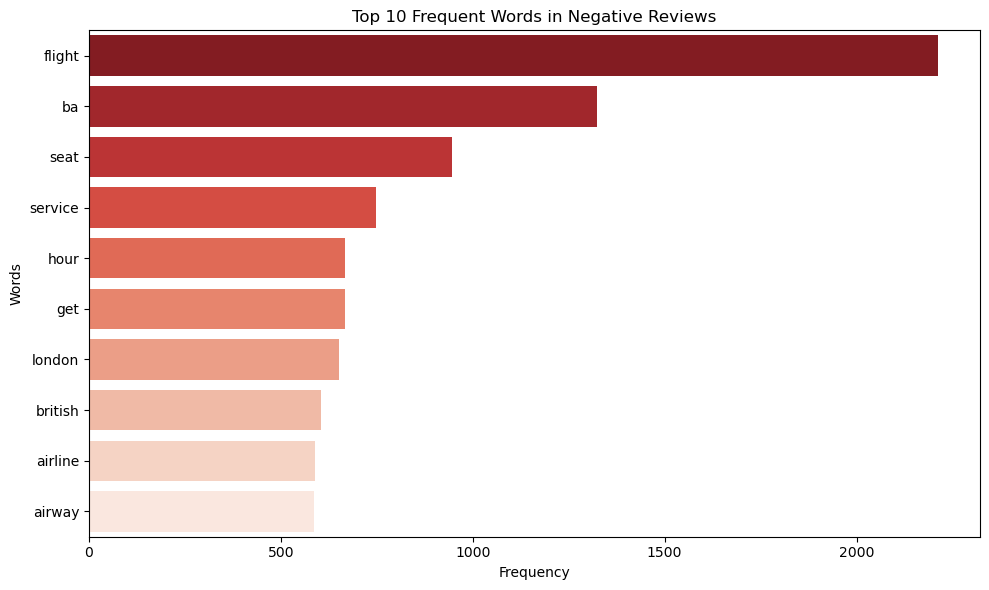

In [45]:
from collections import Counter

# Combine all negative reviews into a single string
negative_reviews = " ".join(df[df["Sentiment"] == "Negative"]["lemmatized_reviews"])
# Tokenize the text
tokens = word_tokenize(negative_reviews)
# Remove stopwords again just to be sure
filtered_words = [word for word in tokens if word not in stopwords.words("english")]

# Count word frequencies
word_freq = Counter(filtered_words)
# Get the 10 most common negative words
most_common_neg = word_freq.most_common(10)

# Convert to two lists for plotting
words, counts = zip(*most_common_neg)

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words), palette="Reds_r")
plt.title("Top 10 Frequent Words in Negative Reviews")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.tight_layout()
plt.show()
